In [337]:
# import packages
import pandas as pd
import numpy as np
import statistics as stat
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [123]:
# import data
test_sources = pd.read_csv("test_sources.csv")
extracts_m = pd.read_csv("extracts.csv")
extracts_key = pd.read_csv("extracts_key.csv")
extracts_aa = pd.read_csv("extracts_aa.csv")
extracts_times = pd.read_csv("extracts_times.csv")

In [12]:
# calculate time statistics
# print(extracts_times["key_time"].mean())
# print(extracts_times["key_time"].median())
# print(extracts_times["auto_time"].mean())
# print(extracts_times["auto_time"].median())

195.5423333333333
173.63
3.2466666666666666
3.11


In [124]:
# keep only the extracts from the 30 random sources
keeplist = extracts_times["id"].values.tolist()
extracts_m = extracts_m[extracts_m['source'].isin(keeplist)]

In [24]:
# count number of extracts
# print(len(extracts_m))
# print(len(extracts_key))
# print(len(extracts_aa))

82
82
255


In [71]:
# count number of extracts by source
# counts_m = extracts_m['source'].value_counts().sort_index()
# counts_key = extracts_key['source'].value_counts().sort_index()
# counts_aa = extracts_aa['source'].value_counts().sort_index()

# join into a single df
# counts = pd.concat([counts_m, counts_key, counts_aa], axis=1)
# counts.columns = ["manual", "key", "aa"]
# counts = counts.fillna(0)
# counts["test_id"] = np.arange(len(counts))+1
# print(counts)

     manual   key    aa  test_id
8       3.0   2.0   4.0        1
9       2.0   2.0  10.0        2
11      3.0   1.0   4.0        3
12      3.0   1.0   5.0        4
18      4.0   1.0   3.0        5
29      2.0   3.0  16.0        6
30      7.0  10.0   1.0        7
31      5.0   1.0   1.0        8
35      2.0   5.0   6.0        9
41      8.0   8.0  10.0       10
47      4.0   1.0  12.0       11
48      3.0   4.0  14.0       12
50      2.0   2.0  10.0       13
51      3.0   6.0   7.0       14
78      2.0   3.0   8.0       15
102     1.0   2.0   1.0       16
105     4.0   6.0  23.0       17
119     5.0   1.0   8.0       18
120     1.0   1.0  11.0       19
123     3.0   2.0   9.0       20
124     2.0   4.0   8.0       21
152     0.0   0.0  14.0       22
192     1.0   0.0  17.0       23
195     1.0   1.0   2.0       24
196     1.0   2.0   4.0       25
197     1.0   1.0   0.0       26
198     4.0   5.0  23.0       27
204     3.0   5.0   8.0       28
206     1.0   1.0   8.0       29
214     1.

In [75]:
# convert columns to int
# counts["manual"] = counts["manual"].astype(int)
# counts["key"] = counts["key"].astype(int)
# counts["aa"] = counts["aa"].astype(int)

In [64]:
# export a counts table to LaTeX
# print(counts.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  manual &  key &  aa \\
\midrule
8   &       3 &    2 &   4 \\
9   &       2 &    2 &  10 \\
11  &       3 &    1 &   4 \\
12  &       3 &    1 &   5 \\
18  &       4 &    1 &   3 \\
29  &       2 &    3 &  16 \\
30  &       7 &   10 &   1 \\
31  &       5 &    1 &   1 \\
35  &       2 &    5 &   6 \\
41  &       8 &    8 &  10 \\
47  &       4 &    1 &  12 \\
48  &       3 &    4 &  14 \\
50  &       2 &    2 &  10 \\
51  &       3 &    6 &   7 \\
78  &       2 &    3 &   8 \\
102 &       1 &    2 &   1 \\
105 &       4 &    6 &  23 \\
119 &       5 &    1 &   8 \\
120 &       1 &    1 &  11 \\
123 &       3 &    2 &   9 \\
124 &       2 &    4 &   8 \\
152 &       0 &    0 &  14 \\
192 &       1 &    0 &  17 \\
195 &       1 &    1 &   2 \\
196 &       1 &    2 &   4 \\
197 &       1 &    1 &   0 \\
198 &       4 &    5 &  23 \\
204 &       3 &    5 &   8 \\
206 &       1 &    1 &   8 \\
214 &       1 &    1 &   8 \\
\bottomrule
\end{tabular}



In [72]:
# separate by relevant sources
# droplist = [152,192]
# extracts_m = extracts_m[~extracts_m['source'].isin(droplist)]
# extracts_aa = extracts_aa[~extracts_aa['source'].isin(droplist)]
# print(len(extracts_m))
# print(len(extracts_aa))

81
224


In [125]:
# keep only the necessary columns
extracts_m = extracts_m.iloc[:,[1,2]]
extracts_key = extracts_key.iloc[:,[1,2]]
extracts_aa = extracts_aa.iloc[:,[1,2]]
test_id = test_sources.iloc[:,[0,1]]
test_id.columns = ["test_id","source"]

In [126]:
# combine the extracts for each source
extracts_m = extracts_m.groupby('source').text.apply(' '.join).reset_index()
extracts_key = extracts_key.groupby('source').text.apply(' '.join).reset_index()
extracts_aa = extracts_aa.groupby('source').text.apply(' '.join).reset_index()

In [313]:
# merge the dataframes together
extracts_all = pd.merge(test_id, extracts_key, how="outer", on="source")
extracts_all = pd.merge(extracts_all, extracts_m, how="outer", on="source")
extracts_all = pd.merge(extracts_all, extracts_aa, how="outer", on="source")

In [314]:
# rename the columns
extracts_all.columns = ["test_id","source","text_key","text_m","text_aa"]

In [315]:
# need to fill Nans will fake text
extracts_all = extracts_all.fillna("nonono")
# remove punctuation
extracts_all['text_key'] = extracts_all['text_key'].str.replace(r'[^\w\s]+', '')
extracts_all['text_m'] = extracts_all['text_m'].str.replace(r'[^\w\s]+', '')
extracts_all['text_aa'] = extracts_all['text_aa'].str.replace(r'[^\w\s]+', '')
# create tokenized versions of each column of extracts
extracts_all['tokens_key_duplicates'] = extracts_all.apply(lambda row: nltk.word_tokenize(row['text_key']) if(np.all(pd.notnull(row))) else row, axis=1)
extracts_all['tokens_m_duplicates'] = extracts_all.apply(lambda row: nltk.word_tokenize(row['text_m']) if(np.all(pd.notnull(row))) else row, axis=1)
extracts_all['tokens_aa_duplicates'] = extracts_all.apply(lambda row: nltk.word_tokenize(row['text_aa']) if(np.all(pd.notnull(row))) else row, axis=1)
# create tokenized versions of each column of extracts removing duplicates (changing to set and back to list gets uniques but loses order)
extracts_all['tokens_key'] = extracts_all.apply(lambda row: list(set(nltk.word_tokenize(row['text_key']))) if(np.all(pd.notnull(row))) else row, axis=1)
extracts_all['tokens_m'] = extracts_all.apply(lambda row: list(set(nltk.word_tokenize(row['text_m']))) if(np.all(pd.notnull(row))) else row, axis=1)
extracts_all['tokens_aa'] = extracts_all.apply(lambda row: list(set(nltk.word_tokenize(row['text_aa']))) if(np.all(pd.notnull(row))) else row, axis=1)

In [316]:
# remove stop words
stop = stopwords.words('english')
extracts_all['tokens_key_stop'] = extracts_all['tokens_key'].apply(lambda x: [item for item in x if item not in stop])
extracts_all['tokens_m_stop'] = extracts_all['tokens_m'].apply(lambda x: [item for item in x if item not in stop])
extracts_all['tokens_aa_stop'] = extracts_all['tokens_aa'].apply(lambda x: [item for item in x if item not in stop])

In [317]:
# calculate counts
extracts_all['count_key_duplicates'] = extracts_all.apply(lambda row: len(row['tokens_key_duplicates']), axis=1)
extracts_all['count_key'] = extracts_all.apply(lambda row: len(row['tokens_key']), axis=1)
extracts_all['count_key_stop'] = extracts_all.apply(lambda row: len(row['tokens_key_stop']), axis=1)

extracts_all['count_m_duplicates'] = extracts_all.apply(lambda row: len(row['tokens_m_duplicates']), axis=1)
extracts_all['count_m'] = extracts_all.apply(lambda row: len(row['tokens_m']), axis=1)
extracts_all['count_m_stop'] = extracts_all.apply(lambda row: len(row['tokens_m_stop']), axis=1)

extracts_all['count_aa_duplicates'] = extracts_all.apply(lambda row: len(row['tokens_aa_duplicates']), axis=1)
extracts_all['count_aa'] = extracts_all.apply(lambda row: len(row['tokens_aa']), axis=1)
extracts_all['count_aa_stop'] = extracts_all.apply(lambda row: len(row['tokens_aa_stop']), axis=1)

In [318]:
# calculate necessary, unnecessary, and missing counts
extracts_all['necessary_m'] = extracts_all.apply(lambda row: sum(el in row['tokens_m'] for el in row['tokens_key']), axis=1)
extracts_all['necessary_m_stop'] = extracts_all.apply(lambda row: sum(el in row['tokens_m_stop'] for el in row['tokens_key_stop']), axis=1)
extracts_all['necessary_aa'] = extracts_all.apply(lambda row: sum(el in row['tokens_aa'] for el in row['tokens_key']), axis=1)
extracts_all['necessary_aa_stop'] = extracts_all.apply(lambda row: sum(el in row['tokens_aa_stop'] for el in row['tokens_key_stop']), axis=1)

extracts_all['unnecessary_m'] = extracts_all['count_m'] - extracts_all['necessary_m']
extracts_all['unnecessary_m_stop'] = extracts_all['count_m_stop'] - extracts_all['necessary_m_stop']
extracts_all['unnecessary_aa'] = extracts_all['count_aa'] - extracts_all['necessary_aa']
extracts_all['unnecessary_aa_stop'] = extracts_all['count_aa_stop'] - extracts_all['necessary_aa_stop']

extracts_all['missing_m'] = extracts_all['count_key'] - extracts_all['necessary_m']
extracts_all['missing_m_stop'] = extracts_all['count_key_stop'] - extracts_all['necessary_m_stop']
extracts_all['missing_aa'] = extracts_all['count_key'] - extracts_all['necessary_aa']
extracts_all['missing_aa_stop'] = extracts_all['count_key_stop'] - extracts_all['necessary_aa_stop']

In [319]:
# calculate percentages
extracts_all['necessary_m_perc'] = extracts_all['necessary_m']/extracts_all['count_m']
extracts_all['necessary_m_stop_perc'] = extracts_all['necessary_m_stop']/extracts_all['count_m_stop']
extracts_all['unnecessary_m_perc'] = extracts_all['unnecessary_m']/extracts_all['count_m']
extracts_all['unnecessary_m_stop_perc'] = extracts_all['unnecessary_m_stop']/extracts_all['count_m_stop']
extracts_all['missing_m_perc'] = extracts_all['missing_m']/extracts_all['count_key']
extracts_all['missing_m_stop_perc'] = extracts_all['missing_m_stop']/extracts_all['count_key_stop']

extracts_all['necessary_aa_perc'] = extracts_all['necessary_aa']/extracts_all['count_aa']
extracts_all['necessary_aa_stop_perc'] = extracts_all['necessary_aa_stop']/extracts_all['count_aa_stop']
extracts_all['unnecessary_aa_perc'] = extracts_all['unnecessary_aa']/extracts_all['count_aa']
extracts_all['unnecessary_aa_stop_perc'] = extracts_all['unnecessary_aa_stop']/extracts_all['count_aa_stop']
extracts_all['missing_aa_perc'] = extracts_all['missing_aa']/extracts_all['count_key']
extracts_all['missing_aa_stop_perc'] = extracts_all['missing_aa_stop']/extracts_all['count_key_stop']

In [320]:
# assign tn, fn, fp, tp
# I need to separate the nonono's
nolist = [152,192,197]
#extracts_nonono = extracts_all[extracts_all['source'].isin(nolist)]
extracts_all = extracts_all[~extracts_all['source'].isin(nolist)]

extracts_all['fp_m'] = np.where(extracts_all['unnecessary_m_perc'] >= 0.2, 1, 0)
extracts_all['fp_m_stop'] = np.where(extracts_all['unnecessary_m_stop_perc'] >= 0.2, 1, 0)
extracts_all['fp_aa'] = np.where(extracts_all['unnecessary_aa_perc'] >= 0.2, 1, 0)
extracts_all['fp_aa_stop'] = np.where(extracts_all['unnecessary_aa_stop_perc'] >= 0.2, 1, 0)

extracts_all['fn_m'] = np.where(extracts_all['missing_m_perc'] >= 0.33, 1, 0)
extracts_all['fn_m_stop'] = np.where(extracts_all['missing_m_stop_perc'] >= 0.33, 1, 0)
extracts_all['fn_aa'] = np.where(extracts_all['missing_aa_perc'] >= 0.33, 1, 0)
extracts_all['fn_aa_stop'] = np.where(extracts_all['missing_aa_stop_perc'] >= 0.33, 1, 0)

extracts_all['tp_m'] = np.where(((extracts_all['missing_m_perc'] < 0.33) & (extracts_all['unnecessary_m_perc'] < 0.2) & (extracts_all['necessary_m_perc'] >= 0.67)), 1, 0)
extracts_all['tp_m_stop'] = np.where(((extracts_all['missing_m_stop_perc'] < 0.33) & (extracts_all['unnecessary_m_stop_perc'] < 0.2) & (extracts_all['necessary_m_stop_perc'] >= 0.67)), 1, 0)
extracts_all['tp_aa'] = np.where(((extracts_all['missing_aa_perc'] < 0.33) & (extracts_all['unnecessary_aa_perc'] < 0.2) & (extracts_all['necessary_aa_perc'] >= 0.67)), 1, 0)
extracts_all['tp_aa_stop'] = np.where(((extracts_all['missing_aa_stop_perc'] < 0.33) & (extracts_all['unnecessary_aa_stop_perc'] < 0.2) & (extracts_all['necessary_aa_stop_perc'] >= 0.67)), 1, 0)

In [321]:
extracts_all

,test_id,source,text_key,text_m,text_aa,tokens_key_duplicates,tokens_m_duplicates,tokens_aa_duplicates,tokens_key,tokens_m,...,fp_aa,fp_aa_stop,fn_m,fn_m_stop,fn_aa,fn_aa_stop,tp_m,tp_m_stop,tp_aa,tp_aa_stop
0,1,8,Finance Minister Colm Imbert is set to probe w...,Finance Minister Colm Imbert is set to probe w...,I assure this Parliament that we will find out...,"[Finance, Minister, Colm, Imbert, is, set, to,...","[Finance, Minister, Colm, Imbert, is, set, to,...","[I, assure, this, Parliament, that, we, will, ...","[Bank, behalf, construction, in, Couva, Develo...","[239, Bank, behalf, matures, arrangement, with...",...,1,1,1,1,0,1,0,0,0,0
1,2,9,Shanghai Construction has been awarded a billi...,Shanghai Construction has been awarded a billi...,Roberto Codallo Shanghai Construction has been...,"[Shanghai, Construction, has, been, awarded, a...","[Shanghai, Construction, has, been, awarded, a...","[Roberto, Codallo, Shanghai, Construction, has...","[5m, Complex, Construction, awarded, expected,...","[points, Complex, bid, Construction, scored, a...",...,1,1,1,1,0,0,0,0,0,0
2,3,11,Minister of Works and Transport Rohan Sinanan ...,According to the website of the Ministry of Wo...,Sinanan spoke to the media yesterday morning a...,"[Minister, of, Works, and, Transport, Rohan, S...","[According, to, the, website, of, the, Ministr...","[Sinanan, spoke, to, the, media, yesterday, mo...","[elimination, website, corridor, budget, with,...","[elimination, temporary, expected, which, sod,...",...,1,1,0,1,0,1,0,0,0,0
3,4,12,The 12 billion hospital equipped with 150 bed ...,By early next week the newly constructed Arima...,When this virus has passed we would have a for...,"[The, 12, billion, hospital, equipped, with, 1...","[By, early, next, week, the, newly, constructe...","[When, this, virus, has, passed, we, would, ha...","[Bank, local, Construction, with, decision, ye...","[Bank, over, Construction, admittance, care, b...",...,1,1,0,1,1,1,0,0,0,0
4,5,18,Bolivian Energy Minister Rafael Alarcon said F...,Bolivian Energy Minister Rafael Alarcon said F...,Chinas Sinohydro to build Ivirizu hydroelectri...,"[Bolivian, Energy, Minister, Rafael, Alarcon, ...","[Bolivian, Energy, Minister, Rafael, Alarcon, ...","[Chinas, Sinohydro, to, build, Ivirizu, hydroe...","[over, budget, voltage, Alarcon, which, be, co...","[while, won, over, well, with, budget, working...",...,0,1,0,0,0,0,1,1,1,0
5,6,29,In Argentina the government has announced in r...,Donald Trump was clear with Latin America duri...,His administration will recognize the dependen...,"[In, Argentina, the, government, has, announce...","[Donald, Trump, was, clear, with, Latin, Ameri...","[His, administration, will, recognize, the, de...","[Bank, President, with, vaccine, military, yea...","[restore, over, seen, farms, energy, trailing,...",...,1,1,1,1,0,0,0,0,0,0
6,7,30,When Alex Tabor made his first trip to Beijing...,When Alex Tabor made his first trip to Beijing...,Please make sure your browser supports JavaScr...,"[When, Alex, Tabor, made, his, first, trip, to...","[When, Alex, Tabor, made, his, first, trip, to...","[Please, make, sure, your, browser, supports, ...","[33, Huiyin, accelerator, communication, Ventu...","[boom, over, primary, 60, communication, Group...",...,1,1,1,1,1,1,0,0,0,0
7,8,31,Sales of Latin American oil cargoes to China h...,Sales of Latin American oil cargoes to China h...,Please make sure your browser supports JavaScr...,"[Sales, of, Latin, American, oil, cargoes, to,...","[Sales, of, Latin, American, oil, cargoes, to,...","[Please, make, sure, your, browser, supports, ...","[period, have, halt, week, as, Sales, already,...","[province, growth, grade, plagued, expected, s...",...,1,1,0,0,1,1,0,0,0,0
8,9,35,When a crowd in Bambari in the Central African...,When a crowd in Bambari in the Central African...,This is basically part and parcel of Russias g...,"[When, a, crowd, in, Bambari, in, the, Central...","[When, a, crowd, in, Bambari, in, the, Central...","[Thi

In [322]:
# calculate tn, fn, fp, tp for the nonono's (part 1)
extracts_nonono
# tn_m   +1
# tn_m_stop   +1
# fp_m   +1
# fp_m_stop   +1
# fp_aa   +2
# fp_aa_stop   +2
# fn_aa   +1
# fn_aa_stop   +1

,test_id,source,text_key,text_m,text_aa,tokens_key_duplicates,tokens_m_duplicates,tokens_aa_duplicates,tokens_key,tokens_m,...,unnecessary_m_perc,unnecessary_m_stop_perc,missing_m_perc,missing_m_stop_perc,necessary_aa_perc,necessary_aa_stop_perc,unnecessary_aa_perc,unnecessary_aa_stop_perc,missing_aa_perc,missing_aa_stop_perc
21,22,152,nonono,nonono,That still leaves the 90 of pineapples growers...,[nonono],[nonono],"[That, still, leaves, the, 90, of, pineapples,...",[nonono],[nonono],...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,1.0,1.0
22,23,192,nonono,Cameroon is dispatching more than a thousand t...,They also hide across the porous border with C...,[nonono],"[Cameroon, is, dispatching, more, than, a, tho...","[They, also, hide, across, the, porous, border...",[nonono],"[internal, Boko, bring, stretched, killed, are...",...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.0,1.0,1.0,1.0
25,26,197,A new meat packaging plant soon to be operatio...,Soon work on a meat packing plant will begin T...,nonono,"[A, new, meat, packaging, plant, soon, to, be,...","[Soon, work, on, a, meat, packing, plant, will...",[nonono],"[factory, provide, with, soon, partners, on, m...","[factory, provide, with, partners, different, ...",...,0.440678,0.466667,0.108108,0.142857,0.0,0.0,1.0,1.0,1.0,1.0


In [324]:
# calculate tn, fn, fp, tp for the nonono's (part 1)
extracts_nonono_197 = extracts_nonono.iloc[2,:]

extracts_nonono_197['fp_m'] = np.where(extracts_nonono_197['unnecessary_m_perc'] >= 0.2, 1, 0)
extracts_nonono_197['fp_m_stop'] = np.where(extracts_nonono_197['unnecessary_m_stop_perc'] >= 0.2, 1, 0)
extracts_nonono_197['fp_aa'] = np.where(extracts_nonono_197['unnecessary_aa_perc'] >= 0.2, 1, 0)
extracts_nonono_197['fp_aa_stop'] = np.where(extracts_nonono_197['unnecessary_aa_stop_perc'] >= 0.2, 1, 0)

extracts_nonono_197['fn_m'] = np.where(extracts_nonono_197['missing_m_perc'] >= 0.33, 1, 0)
extracts_nonono_197['fn_m_stop'] = np.where(extracts_nonono_197['missing_m_stop_perc'] >= 0.33, 1, 0)
extracts_nonono_197['fn_aa'] = np.where(extracts_nonono_197['missing_aa_perc'] >= 0.33, 1, 0)
extracts_nonono_197['fn_aa_stop'] = np.where(extracts_nonono_197['missing_aa_stop_perc'] >= 0.33, 1, 0)

extracts_nonono_197['tp_m'] = np.where(((extracts_nonono_197['missing_m_perc'] < 0.33) & (extracts_nonono_197['unnecessary_m_perc'] < 0.2) & (extracts_nonono_197['necessary_m_perc'] >= 0.67)), 1, 0)
extracts_nonono_197['tp_m_stop'] = np.where(((extracts_nonono_197['missing_m_stop_perc'] < 0.33) & (extracts_nonono_197['unnecessary_m_stop_perc'] < 0.2) & (extracts_nonono_197['necessary_m_stop_perc'] >= 0.67)), 1, 0)
extracts_nonono_197['tp_aa'] = np.where(((extracts_nonono_197['missing_aa_perc'] < 0.33) & (extracts_nonono_197['unnecessary_aa_perc'] < 0.2) & (extracts_nonono_197['necessary_aa_perc'] >= 0.67)), 1, 0)
extracts_nonono_197['tp_aa_stop'] = np.where(((extracts_nonono_197['missing_aa_stop_perc'] < 0.33) & (extracts_nonono_197['unnecessary_aa_stop_perc'] < 0.2) & (extracts_nonono_197['necessary_aa_stop_perc'] >= 0.67)), 1, 0)

extracts_nonono_197
# fp_m   +1
# fp_m_stop   +1

C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Matt\Anaconda3\lib\site-packages\pandas\core\series.py:914: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWar

test_id                                                                    26
source                                                                    197
text_key                    A new meat packaging plant soon to be operatio...
text_m                      Soon work on a meat packing plant will begin T...
text_aa                                                                nonono
tokens_key_duplicates       [A, new, meat, packaging, plant, soon, to, be,...
tokens_m_duplicates         [Soon, work, on, a, meat, packing, plant, will...
tokens_aa_duplicates                                                 [nonono]
tokens_key                  [factory, provide, with, soon, partners, on, m...
tokens_m                    [factory, provide, with, partners, different, ...
tokens_aa                                                            [nonono]
tokens_key_stop             [factory, provide, soon, partners, meat, Banga...
tokens_m_stop               [factory, provide, partners, differe

In [325]:
# tabulate tn, fn, fp, tp
fp_m = sum(extracts_all["fp_m"]) + 1
fp_m_stop = sum(extracts_all["fp_m_stop"]) + 1
fn_m = sum(extracts_all["fn_m"])
fn_m_stop = sum(extracts_all["fn_m_stop"])
tp_m = sum(extracts_all["tp_m"])
tp_m_stop = sum(extracts_all["tp_m_stop"])
tn_m = 1
tn_m_stop = 1
print("manual --", " fp: ", fp_m, " fn: " , fn_m, " tp: ", tp_m, " tn: ", tn_m)
print("manual_stop --", " fp: ", fp_m_stop, " fn: " , fn_m_stop, " tp: ", tp_m_stop, " tn: ", tn_m_stop)

fp_aa = sum(extracts_all["fp_aa"]) + 2
fp_aa_stop = sum(extracts_all["fp_aa_stop"]) + 2
fn_aa = sum(extracts_all["fn_aa"]) + 1
fn_aa_stop = sum(extracts_all["fn_aa_stop"]) + 1
tp_aa = sum(extracts_all["tp_aa"])
tp_aa_stop = sum(extracts_all["tp_aa_stop"])
tn_aa = 0
tn_aa_stop = 0
print("aa --", " fp: ", fp_aa, " fn: " , fn_aa, " tp: ", tp_aa, " tn: ", tn_aa)
print("aa_stop --", " fp: ", fp_aa_stop, " fn: " , fn_aa_stop, " tp: ", tp_aa_stop, " tn: ", tn_aa_stop)

manual --  fp:  19  fn:  11  tp:  7  tn:  1
manual_stop --  fp:  19  fn:  15  tp:  7  tn:  1
aa --  fp:  28  fn:  12  tp:  1  tn:  0
aa_stop --  fp:  29  fn:  14  tp:  0  tn:  0


In [329]:
# calculate precision, recall, F1-score
precision_m = tp_m/(tp_m+fp_m)
precision_m_stop = tp_m_stop/(tp_m_stop+fp_m_stop)
recall_m = tp_m/(tp_m+fn_m)
recall_m_stop = tp_m_stop/(tp_m_stop+fn_m_stop)
f1_m = 2*(((precision_m)*(recall_m))/((precision_m)+(recall_m)))
f1_m_stop = 2*(((precision_m_stop)*(recall_m_stop))/((precision_m_stop)+(recall_m_stop)))
print("manual --", " precision: ", precision_m, " recall: ", recall_m, "F-1 score: ", f1_m)
print("manual_stop --", " precision: ", precision_m_stop, " recall: ", recall_m_stop, "F-1 score: ", f1_m_stop)

precision_aa = tp_aa/(tp_aa+fp_aa)
precision_aa_stop = 0 # tp_aa_stop/(tp_aa_stop+fp_aa_stop)
recall_aa = tp_aa/(tp_aa+fn_aa)
recall_aa_stop = 0 # tp_aa_stop/(tp_aa_stop+fn_aa_stop)
f1_aa = 2*(((precision_aa)*(recall_aa))/((precision_aa)+(recall_aa)))
f1_aa_stop = 0 # 2*(((precision_aa_stop)*(recall_aa_stop))/((precision_aa_stop)+(recall_aa_stop)))
print("aa --", " precision: ", precision_aa, " recall: ", recall_aa, "F-1 score: ", f1_aa)
print("aa_stop --", " precision: ", precision_aa_stop, " recall: ", recall_aa_stop, "F-1 score: ", f1_aa_stop)

manual --  precision:  0.2692307692307692  recall:  0.3888888888888889 F-1 score:  0.3181818181818182
manual_stop --  precision:  0.2692307692307692  recall:  0.3181818181818182 F-1 score:  0.2916666666666667
aa --  precision:  0.034482758620689655  recall:  0.07692307692307693 F-1 score:  0.04761904761904762
aa_stop --  precision:  0  recall:  0 F-1 score:  0


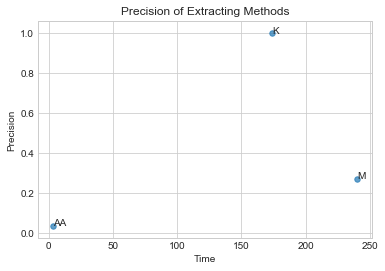

In [348]:
y = [1,precision_m,precision_aa]
x = [174,240,3.25]
l = ["K", "M", "AA"]
t = "Precision of Extracting Methods"

plt.scatter(x, y, alpha=0.7, s=30)
for i, txt in enumerate(l):
    plt.annotate(txt, (x[i], y[i]))
plt.title(t)
plt.xlabel('Time')
plt.ylabel('Precision')
plt.savefig('Precision.png')

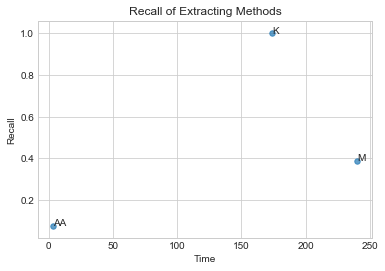

In [350]:
y = [1,precision_m_stop,precision_aa_stop]
x = [174,240,3.25]
l = ["K", "M", "AA"]
t = "Precision of Extracting Methods (Stop Words)"

plt.scatter(x, y, alpha=0.7, s=30)
for i, txt in enumerate(l):
    plt.annotate(txt, (x[i], y[i]))
plt.title(t)
plt.xlabel('Time')
plt.ylabel('Precision')
plt.savefig('Precision_stopwords.png')

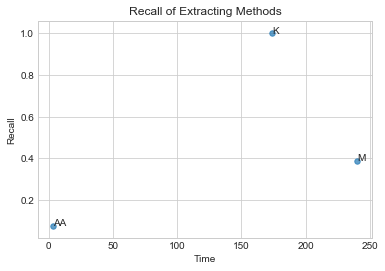

In [352]:
y = [1,recall_m,recall_aa]
x = [174,240,3.25]
l = ["K", "M", "AA"]
t = "Recall of Extracting Methods"

plt.scatter(x, y, alpha=0.7, s=30)
for i, txt in enumerate(l):
    plt.annotate(txt, (x[i], y[i]))
plt.title(t)
plt.xlabel('Time')
plt.ylabel('Recall')
plt.savefig('Recall.png')

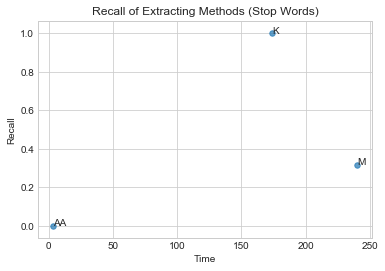

In [353]:
y = [1,recall_m_stop,recall_aa_stop]
x = [174,240,3.25]
l = ["K", "M", "AA"]
t = "Recall of Extracting Methods (Stop Words)"

plt.scatter(x, y, alpha=0.7, s=30)
for i, txt in enumerate(l):
    plt.annotate(txt, (x[i], y[i]))
plt.title(t)
plt.xlabel('Time')
plt.ylabel('Recall')
plt.savefig('Recall_stopwords.png')

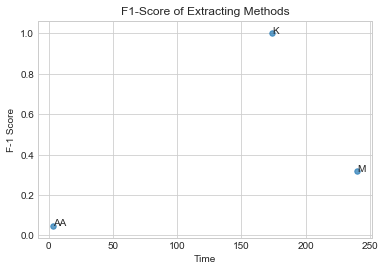

In [354]:
y = [1,f1_m,f1_aa]
x = [174,240,3.25]
l = ["K", "M", "AA"]
t = "F1-Score of Extracting Methods"

plt.scatter(x, y, alpha=0.7, s=30)
for i, txt in enumerate(l):
    plt.annotate(txt, (x[i], y[i]))
plt.title(t)
plt.xlabel('Time')
plt.ylabel('F-1 Score')
plt.savefig('F1score.png')

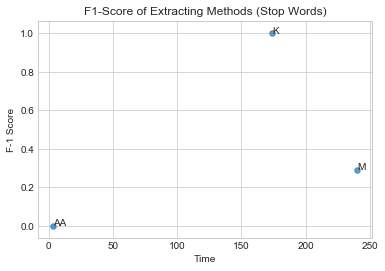

In [355]:
y = [1,f1_m_stop,f1_aa_stop]
x = [174,240,3.25]
l = ["K", "M", "AA"]
t = "F1-Score of Extracting Methods (Stop Words)"

plt.scatter(x, y, alpha=0.7, s=30)
for i, txt in enumerate(l):
    plt.annotate(txt, (x[i], y[i]))
plt.title(t)
plt.xlabel('Time')
plt.ylabel('F-1 Score')
plt.savefig('F1score_stopwords.png')